In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper

In [ ]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)


In [ ]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc[:, :2])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [ ]:
AA = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [ ]:
AA.fit_transform(pc[:, :2])

In [ ]:
print(AA.alfa)
print(AA.alfa.shape)
print(AA.alfa[:, 0])

In [ ]:
np.max(AA.alfa), np.min(AA.alfa)

In [ ]:
#sites_archetype = list(map(arch2color, np.argmax(AA.alfa, axis=0)))
def get_one(v):
    return v if v <= 1.0 else 1.0
sites_archetype = [(get_one(c[0]),get_one(c[1]),get_one(c[2])) for c in AA.alfa.T]

In [ ]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=sites_archetype, original_axis=None, archetypes=AA.archetypes, cell_type=None)

In [ ]:
AA.plot_simplex(AA.alfa, plot_args={'c': sites_archetype})

In [ ]:
AA.archetypes

In [ ]:
n_comp = 2
res = np.dot(AA.archetypes.T, pca.components_[:n_comp,:])+np.mean(sites, axis=0)

In [ ]:
for a in range(3):
    plt.figure(figsize=(20, 5))
    y_pos = np.arange(len(res[a]))
    plt.bar(y_pos, res[a])
    plt.xticks(y_pos, CELL_TYPES)
    #plt.xlabel('Patient ID')
    #plt.ylabel("Relative Error")
    #plt.title("Relative misfit error for every patient")

### 3D Archetypes - All tumors

In [3]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca_3d = PCA()
pc3d = pca_3d.fit_transform(sites)

In [ ]:
n_archs = list(range(2, 6))

lst_exp_var = []
for n_arch in n_archs:
    AA = ArchetypalAnalysis(n_archetypes = n_arch, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                            
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
    AA.fit(pc3d[:, :3])
    lst_exp_var.append(AA.explained_variance_)

plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [ ]:
plt.plot(n_archs, lst_exp_var, '-o')
plt.ylim(0, 1)
plt.show()

In [4]:
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc3d[:, :3])

array([[  6.63060294,  16.01706834, -13.25226088],
       [ -7.45140645,   7.25640492, -13.61370705],
       [ -3.26846415,  19.16298869, -17.83161786],
       ...,
       [113.77716532, -38.30143253, -34.5107815 ],
       [111.97119703, -42.51354609, -34.90535497],
       [ 61.43549008, -26.09046887,  -8.07587381]])

In [ ]:
np.array([0, 153, 51]) / 255

In [5]:
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
p = np.array(sites_archetype)
p[p > 1]

array([], dtype=float64)

0.86% Total Exp. Var.


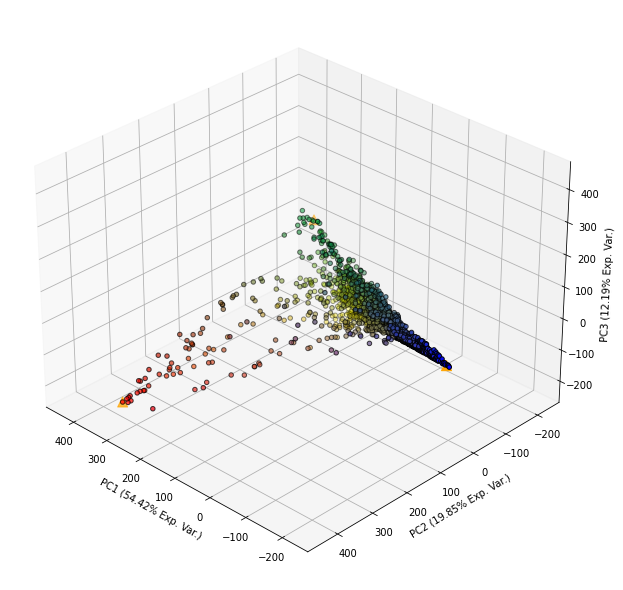

In [6]:
#%matplotlib notebook
plot_3Dscatter_pca(pc3d, pca_3d.explained_variance_ratio_, labels=sites_archetype, archetypes=AA_3D.archetypes)

In [15]:
pc3d[:, :3]
AA_3D.alfa.T

array([[5.63841881e-02, 6.34862651e-02, 3.21915459e-01, 5.58214088e-01],
       [3.51622820e-02, 4.75346259e-02, 3.49016972e-01, 5.68286120e-01],
       [5.92615411e-02, 3.99820645e-02, 3.46350640e-01, 5.54405754e-01],
       ...,
       [2.24366977e-02, 7.18063377e-02, 0.00000000e+00, 9.05780076e-01],
       [1.46067812e-02, 6.77721583e-02, 6.64546194e-04, 9.16956514e-01],
       [7.41560676e-03, 1.18595557e-01, 1.54314560e-01, 7.19674275e-01]])

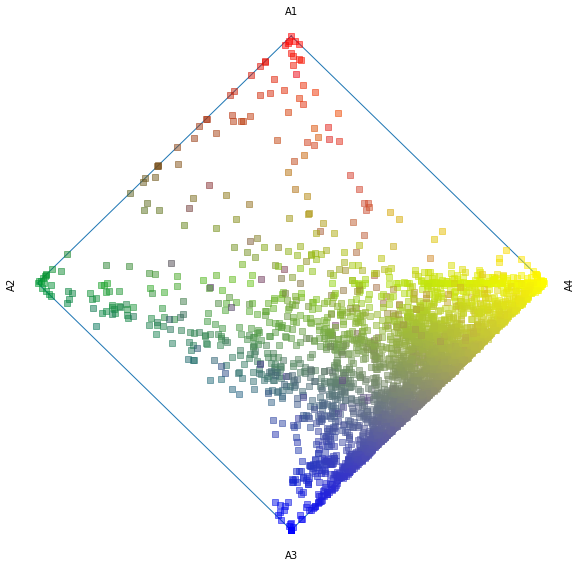

In [7]:
AA_3D.plot_simplex(AA_3D.alfa, plot_args={'c': sites_archetype})

In [6]:
n_comp = 3
res = np.dot(AA_3D.archetypes.T, pca_3d.components_[:n_comp,:])+np.mean(sites, axis=0)

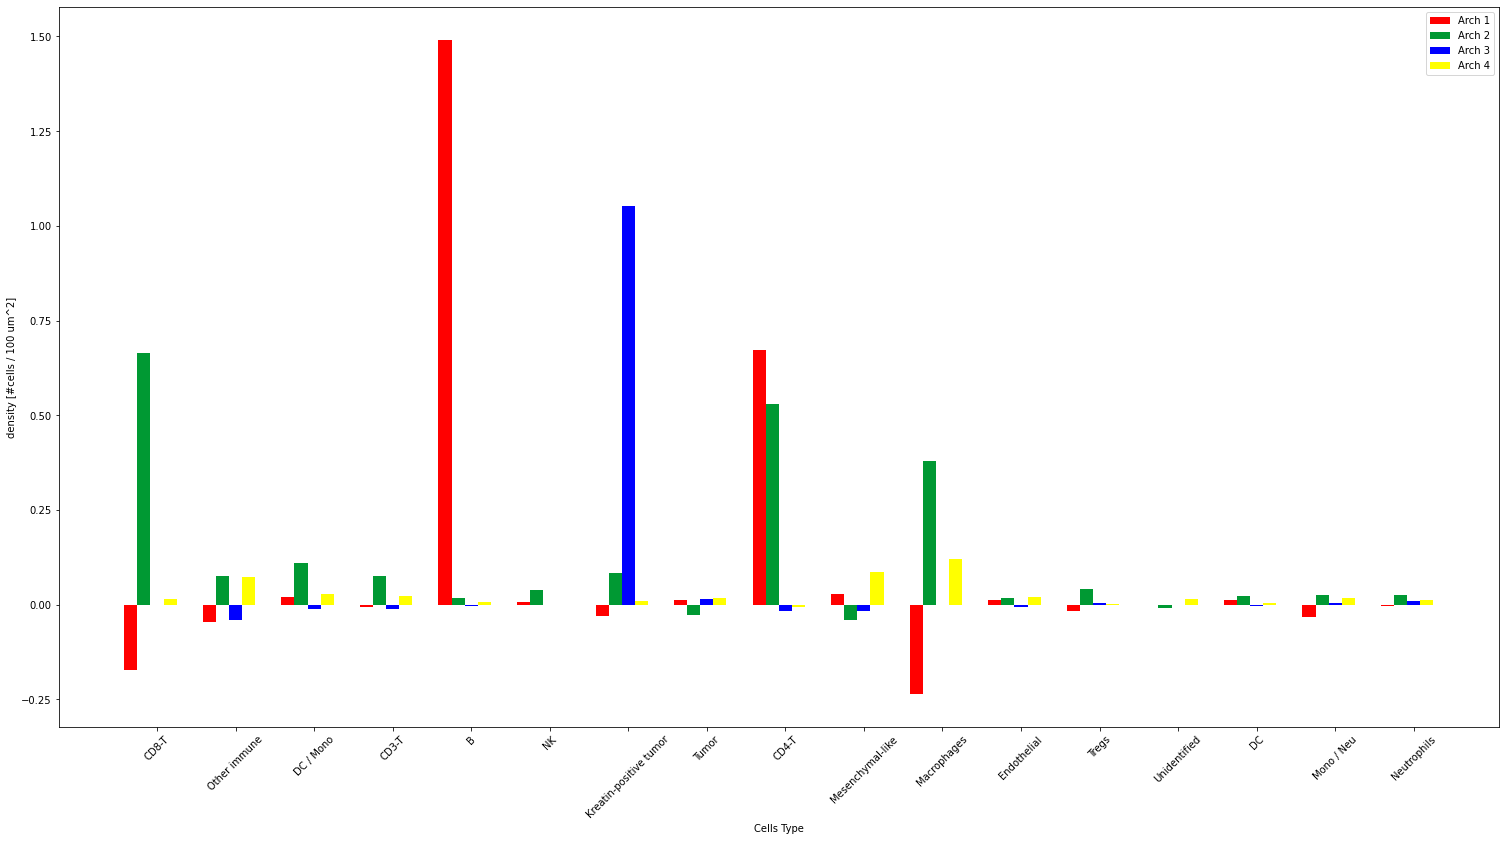

In [7]:
archetype_colors = [[1., 0., 0.], [0. , 0.6, 0.2], [0., 0., 1.], [1.0, 1.0, 0.]]
archetypes_bar_plot(res, CELL_TYPES, archetype_colors, y_axis='density', radius=RADIUS)

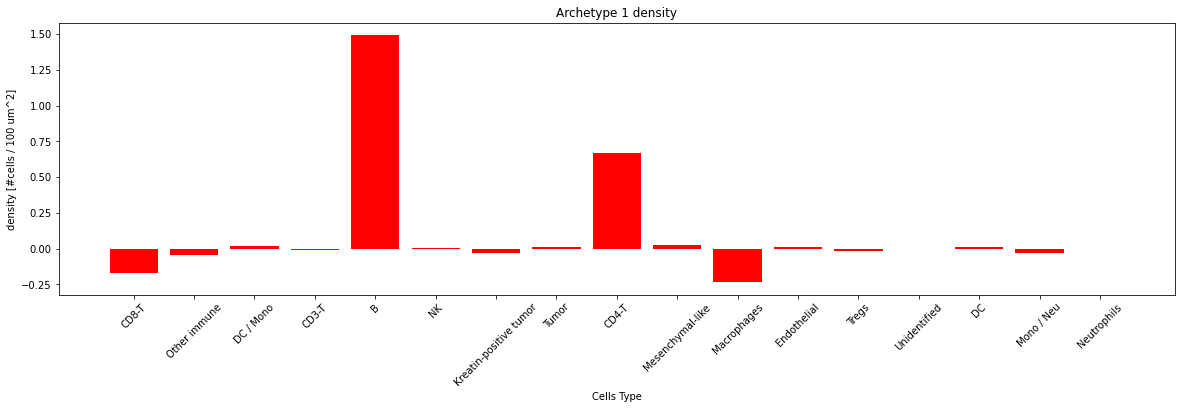

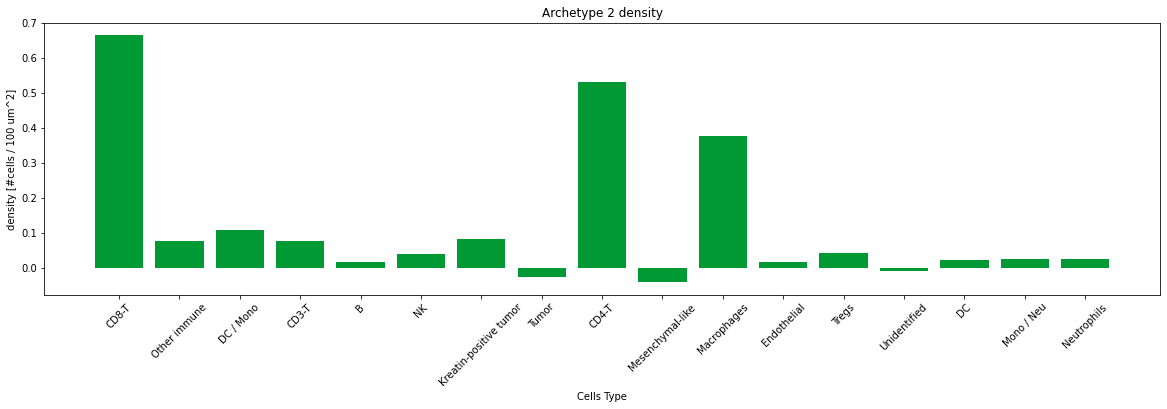

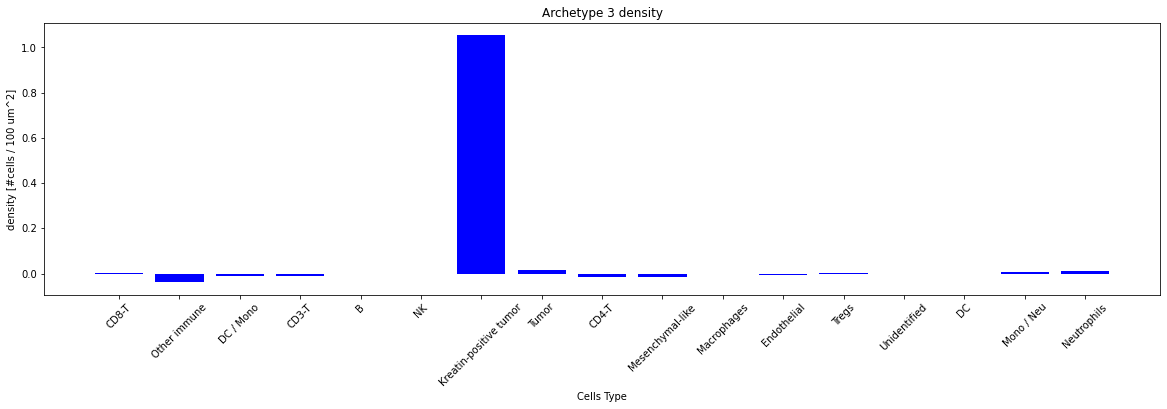

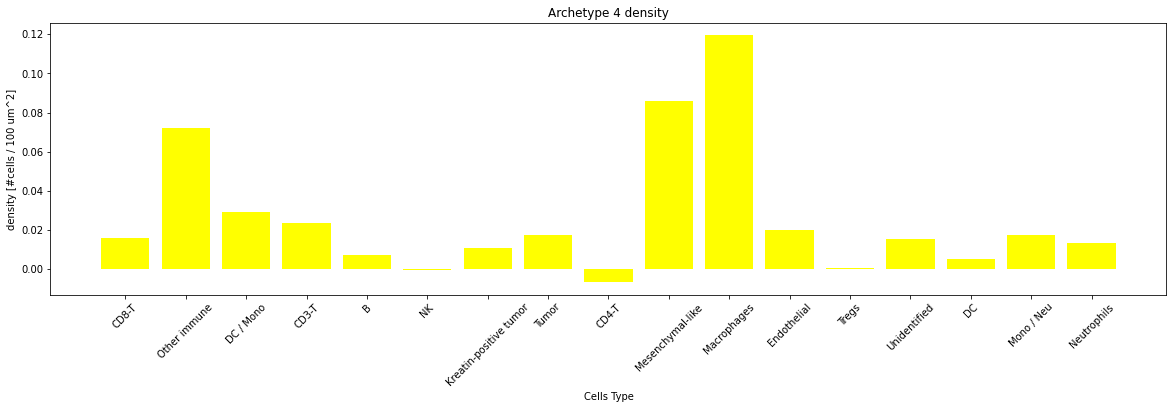

In [11]:
for a in range(4):
    archetype_simple_plot(res[a], a, archetype_colors, CELL_TYPES, y_axis='density')

In [ ]:
d = np.array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
print(d)
new_pc = pca_3d.transform(d)
AA_3D.transform(new_pc[:, :3])

In [ ]:
import pickle
with open("pca_3d", "wb") as f:
    pickle.dump(pca_3d, f)

with open("AA_3D", "wb") as f:
    pickle.dump(AA_3D, f)

### Sites Archetypes

In [ ]:
AA_sites = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [ ]:
AA_sites.fit_transform(sites)

In [ ]:
sites_archetype = list(map(arch2color, np.argmax(AA_sites.alfa, axis=0)))
AA_sites.plot_simplex(AA_sites.alfa, plot_args={'color': sites_archetype})

In [ ]:
AA_sites.plot_profile(CELL_TYPES)